LIBRARIES

In [74]:
import  pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,r2_score 
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
import seaborn as sns 
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
x=data.drop('species',axis=1)
y=data['species']

In [76]:
scale=StandardScaler()
x_scaled = scale.fit_transform(x)


In [77]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(x_scaled)
pca_data=pd.DataFrame(pca_data,columns=['pca1','pca2'])
pca_data

,pca1,pca2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [78]:
Tsvd=TruncatedSVD(n_components=2)
pca_data=Tsvd.fit_transform(x_scaled)
pca_data=pd.DataFrame(pca_data,columns=['pca1','pca2'])
pca_data.head(10)

,pca1,pca2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
5,-2.075631,1.489178
6,-2.444029,0.047644
7,-2.232847,0.223148
8,-2.334640,-1.115328
9,-2.184328,-0.469014


In [79]:
pca_data['species']=y

In [80]:
pca_data

,pca1,pca2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


In [81]:
label=LabelEncoder()
pca_data['species']=label.fit_transform(y)

In [82]:
pca_data

,pca1,pca2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [83]:
u,sigma,vt=np.linalg.svd(x_scaled)
x_svd=x_scaled @ vt.T[:,:2]

In [84]:
new=data

new=new.drop('species',axis=1)


z=new[['sepal_length','sepal_width']]
t=new['petal_length']

z_train,z_test,t_train,t_test=train_test_split(z,t,test_size=0.2,random_state=10)

lr=LinearRegression()
lr.fit(z_train,t_train)
lr.score(z_test,t_test)

t_pred=lr.predict(z_test)

meanabs=mean_absolute_error(t_test,t_pred)
meanSQR=np.sqrt(meanabs)
r_sqr=r2_score(t_test,t_pred)

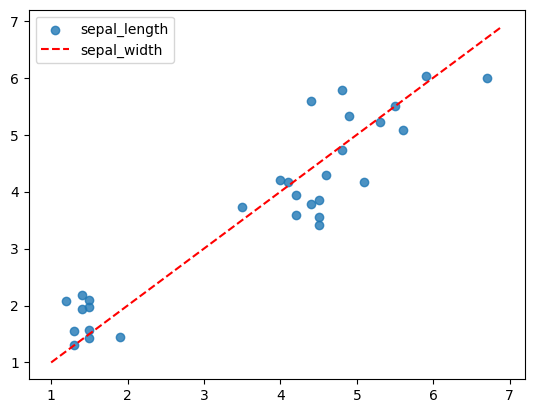

In [85]:
import matplotlib.pyplot as plt 
plt.scatter(t_test,t_pred,alpha=0.8)

plt.plot([t.min(),t.max()],[t.min(),t.max()],color='red',linestyle='--')
plt.legend(new)

determinant manual

In [86]:
array=np.array([[1,2,3],[4,5,6],[ 8,9,9]])
def matrix(array):
    a,b,c=array[0]
    e,d,f=array[1]
    g,h,i=array[2]
    
    x= (a*(d*i-f*h)) - (b*(e*i-f*g)) + (c*(e*h-d*g))
    return x  
matrix(array)

np.int64(3)

In [87]:
np.linalg.det(array)

np.float64(3.000000000000001)

In [88]:
from sklearn.decomposition import PCA
import pandas as pd 
import seaborn as sns 

data=sns.load_dataset('iris')
data.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [89]:
x=data.drop('species',axis=1)

from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x)

In [90]:
pca=PCA(n_components=2)
pca_x=pca.fit_transform(x_scaled)

pca_data=pd.DataFrame(pca_x,columns=['pca1','pca2'])
pca_data.head(10)

,pca1,pca2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
5,-2.075631,1.489178
6,-2.444029,0.047644
7,-2.232847,0.223148
8,-2.334640,-1.115328
9,-2.184328,-0.469014


In [91]:
import numpy as np
u,sigma,v=np.linalg.svd(x_scaled)
print(f'left singnular {u}, right singular{v},singular value{sigma} ')

left singnular [[-1.08239531e-01 -4.09957970e-02  2.72186462e-02 ...  5.43380310e-02
   1.96438400e-03  2.46978090e-03]
 [-9.94577561e-02  5.75731483e-02  5.00034005e-02 ...  5.12936114e-03
   8.48544595e-02  5.83496936e-03]
 [-1.12996303e-01  2.92000319e-02 -9.42089147e-03 ...  2.75184277e-02
   1.78604309e-01  1.49419118e-01]
 ...
 [ 7.27030413e-02 -2.29793601e-02 -3.84023516e-02 ...  9.89532683e-01
  -1.25488246e-02 -7.17729676e-04]
 [ 6.56112167e-02 -8.63643414e-02 -1.98939364e-01 ... -1.41206665e-02
   9.52049996e-01 -2.32048811e-02]
 [ 4.59137323e-02  2.07800179e-03 -1.12588405e-01 ... -8.30595907e-04
  -2.19201906e-02  9.77300244e-01]], right singular[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]],singular value[20.92306556 11.7091661   4.69185798  1.76273239] 


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

data
data.drop('species',axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
x=data[['sepal_length','sepal_width']]
y=data['petal_length']


x_train , x_test , y_train,y_test=train_test_split(x,y)

lr=LinearRegression()
lr.fit(x_train,y_train)
lr
y_pred=lr.predict(x_test)


mbe=mean_absolute_error(y_pred,y_test)

smbe=np.sqrt(mbe)

r2=r2_score(y_pred,y_test)
print(f'mean absolute error {mbe}, r squared : {r2}')

mean absolute error 0.5677289661254425, r squared : 0.697353744650582
